<a href="https://colab.research.google.com/github/luismiguelcasadodiaz/IBM_SkillsBuild_IA_325/blob/main/IA_325_py_cod_ex_53_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción del consumo energético
## 📘 Contexto:

La eficiencia energética es una prioridad en las ciudades modernas. Las compañías eléctricas intentan predecir cuánto se consumirá en función de las condiciones meteorológicas. En este proyecto, desarrollarás un modelo de regresión lineal que permita predecir el consumo de energía en función de la temperatura ambiental.



## 🎯 Objetivo del proyecto:

Construir un sistema que:

  + 1.- Genere datos sintéticos con numpy representando temperatura (°C) y consumo energético (kWh).

  + 2.- Use regresión lineal (sklearn.linear_model.LinearRegression) para aprender la relación entre ambas variables.

  + 3.- Permita hacer predicciones para nuevas temperaturas.

  + 4.- Visualice los datos y el modelo con matplotlib.



## 🛠️ Requerimientos:

1. **Crear una clase** EnergyRecord

  + Guarda los atributos: temperature y consumption.

  + Añade un método .to_vector() que devuelva [temperature] como vector de entrada al modelo.

2. **Generar los datos con una clase** EnergyDataGenerator

  + Crea datos sintéticos con numpy.random.uniform(-5, 35) para la temperatura.

  + Calcula el consumo simulando que **cuando hace más frío o más calor que 20 °C**, el consumo aumenta:   consumo = 100 + (abs(temperatura - 20) * 3) + ruido

  + Añade un poco de ruido con numpy.random.normal(0, 5).

  + El método generate() devuelve una lista de objetos EnergyRecord

3. **Crear la clase** EnergyRegressor

  + Usa LinearRegression de sklearn para ajustar el modelo.

  + Métodos necesarios:

    + fit() para entrenar con una lista de EnergyRecord.

    + predict(temperature) para predecir consumo dado una temperatura.

    + get_model() para acceder al modelo (útil para graficar).

4. **Implementar una clase** EnergyPredictionExample

  + Que cree los datos, entrene el modelo y prediga para una temperatura nueva (por ejemplo, 30 °C).

  + También debe mostrar una gráfica:

    + Un scatter plot de los datos.

    + Una línea roja representando la recta de regresión.

5. **Visualización** con matplotlib

  + Agrega títulos, etiquetas de ejes y leyenda para una mejor comprensión.

  + Usa .plot() para la línea de predicción del modelo.



## ✅ Ejemplo de uso
```python
example = EnergyPredictionExample()
example.run()
```

## Salida esperada
```python
🔍 Temperatura: 30 °C
⚡ Predicción de consumo: 120.70 kWh
```

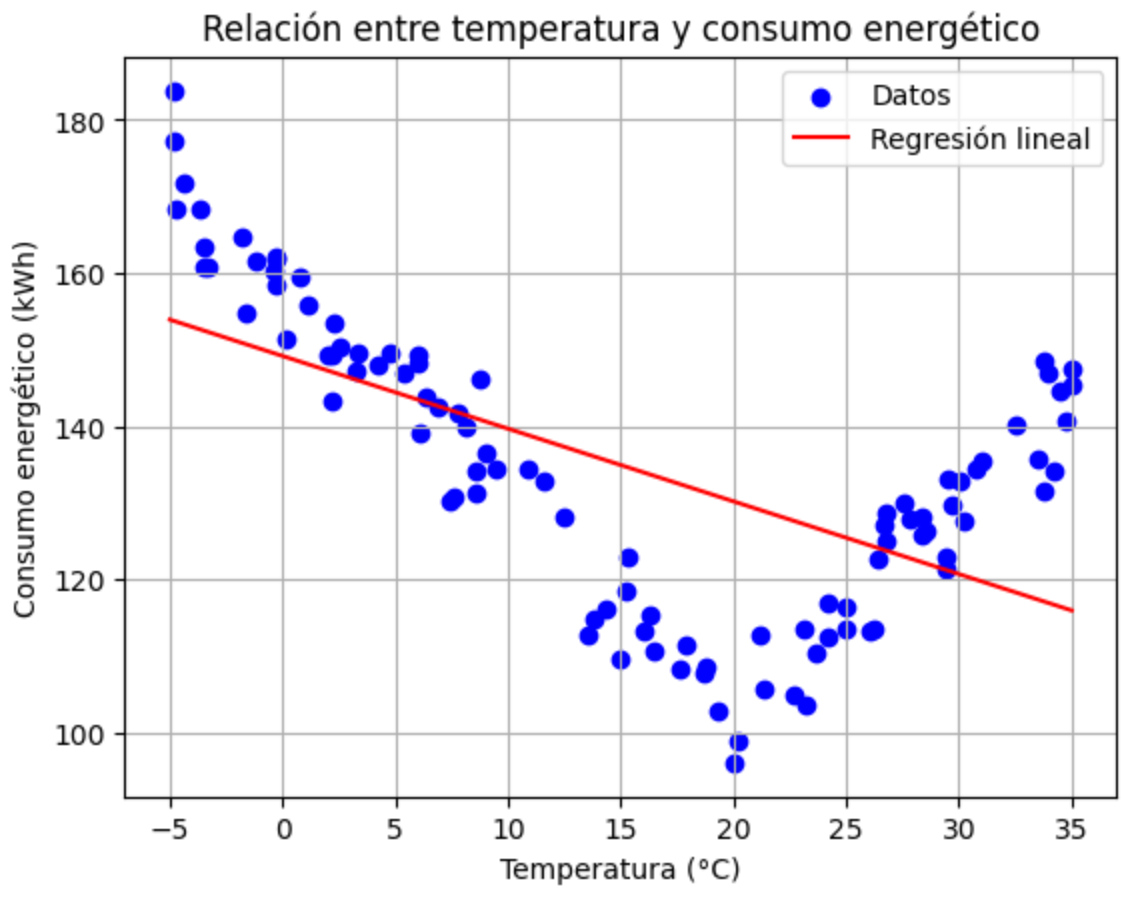

## Importar librerías

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Definición de la clase EnergyRecord

In [120]:
class EnergyRecord:
    """
    Representa un registro individual de consumo energético.

    Esta clase almacena los datos de temperatura y consumo energético
    para un punto de datos específico.

    Atributos:
        temperature (float): La temperatura ambiental en grados Celsius.
        consumption (float): El consumo de energía registrado en kilovatios-hora (kWh).
    """
    def __init__(self, temperature, consumption=None):
        """
        Inicializa una nueva instancia de EnergyRecord.

        Args:
            temperature (float): La temperatura ambiental.
            consumption (float): El consumo de energía registrado.
        """
        self.temperature = temperature
        self.consumption = consumption
    def to_vector(self):
        """
        Convierte la temperatura a un formato vectorial para el modelo.

        Dado que el modelo de regresión lineal simple espera un vector
        de entrada, este método devuelve la temperatura como una lista
        de un solo elemento.

        Returns:
            list: Una lista que contiene la temperatura: [temperature].
        """
        return [self.temperature]
    def __str__(self):
        return f"Temperatura: {self.temperature:6.2f} °C, Consumo: {self.consumption:6.2f} kWh"

## Definición de la clase EnergyDataGenerator

In [121]:
class EnergyDataGenerator:
    """
    Generador de datos sintéticos para el consumo energético.

    Esta clase se encarga de crear un conjunto de datos simulados
    compuestos por registros de temperatura y consumo energético,
    siguiendo un patrón definido más un componente de ruido.
    """
    def __init__(self, n_samples=100):
      self.n_samples = n_samples
      self.data = []

    def generate(self):

      """
      Genera una lista de objetos EnergyRecord sintéticos.

      Los datos de temperatura se generan de forma uniforme entre -5°C y 35°C.
      El consumo se calcula basándose en la desviación absoluta de 20°C,
      simulando que el consumo aumenta con temperaturas extremas (frío o calor),
      y se le añade ruido gaussiano para simular variabilidad.

      Args:
          num_samples (int): El número de registros de datos a generar.

      Returns:
          list: Una lista de objetos EnergyRecord, cada uno con
                una temperatura y consumo asociados.
      """
      # Genera todas las temperaturas aleatorias uniformemente distribuidas
      temps = np.random.uniform(-5, 35, self.n_samples)

      # Genera todos los ruidos
      noises = np.random.normal(0, 5, self.n_samples)

      # Calcula los consumos basado en la desviación de 20°C más ruido
      # consumo = 100 + (abs(temperatura - 20) * 3) + ruido

      consums = 100 + (np.abs(temps - 20) * 3) + noises

      # Crea y devuelve una lista de objetos EnergyRecord
      self.data = [EnergyRecord(tem, con) for tem, con in zip(temps, consums)]
      return self.data

## Definición de la clase EnergyRegressor

In [122]:
class EnergyRegressor:
    def __init__(self):
        self.model = LinearRegression()
    def fit(self, data: list):
        X = np.array([record.to_vector() for record in data])
        y = np.array([record.consumption for record in data])
        self.model.fit(X, y)
    def predict(self, X):
        X_test = np.array(X)
        return self.model.predict(X_test.reshape(-1, 1))[0]
    def get_model(self):
        return self.model

## Definición de la clase  EnergyPredicitonExample

In [123]:
class EnergyPredictionExample:
    def __init__(self):
        self.generator = EnergyDataGenerator()
        self.data = self.generator.generate()
        self.model = EnergyRegressor()
    def run(self):

        self.model = EnergyRegressor()
        self.model.fit(self.data)
        temperatura = 30
        y_pred = self.model.predict([temperatura])
        print(f"🔍 Temperatura: {temperatura} °C")
        print(f"🔮 Consumo estimado: {y_pred:6.2f} kWh")
        plt.figure(figsize=(10, 6))
        plt.scatter([record.temperature for record in self.data], [record.consumption for record in self.data], label='Datos reales', color='blue')
        y_pred = [self.model.predict([record.temperature]) for record in self.data]
        plt.plot([record.temperature for record in self.data], y_pred, label='Regresión lineal', color='red')
        plt.xlabel('Temperatura (°C)')
        plt.ylabel('Consumo Energético(kWh)')
        plt.title('Predicción de Consumo Energético')
        plt.legend()
        plt.grid(True)
        plt.show()


## Ejemplo de uso

🔍 Temperatura: 30 °C
🔮 Consumo estimado: 116.32 kWh


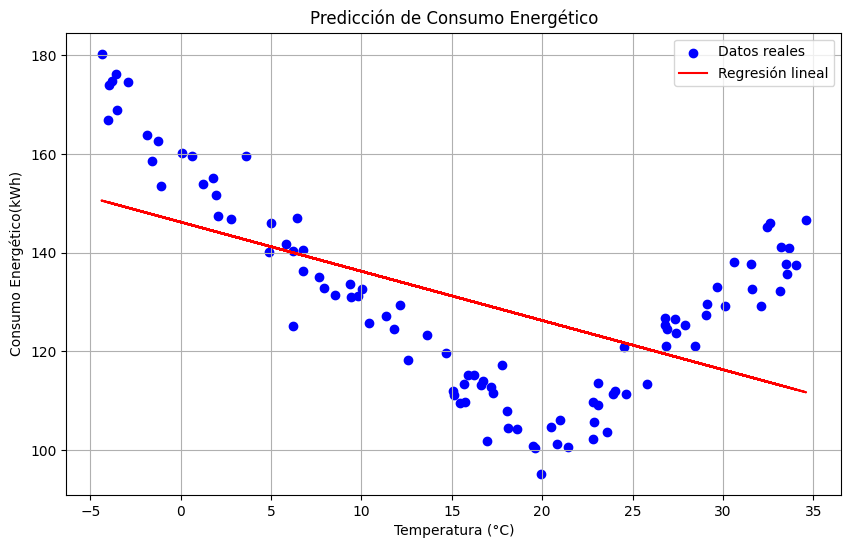

In [124]:
ejemplo = EnergyPredictionExample()
ejemplo.run()

In [125]:


def generate_a(n_samples):
  data = []
  np.random.seed(42)
  for _ in range(n_samples):
    t = np.random.uniform(-5, 33)
    c = 100 + ( abs(t - 29) * 3 ) + np.random.normal(0, 5)
    data.append(EnergyRecord(t, c))
  return data

# eficiente generación de datos sintéticos
def generate_b(n_samples):
  np.random.seed(42)
  t = np.random.uniform(-5, 33, n_samples )
  r = np.random.normal(0, 5, n_samples)
  c = 100 + ( abs(t - 29) * 3 ) + r
  return [EnergyRecord(ti, ci,) for ti, ci in zip(t, c)]


In [126]:
%%timeit
a = generate_a(100)

583 µs ± 177 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [127]:
%%timeit
a = generate_b(100)

55.1 µs ± 991 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
